In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [4]:
dataFrame = pd.read_csv("titanic.csv")

In [7]:
dataFrame.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [8]:
dataFrame.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

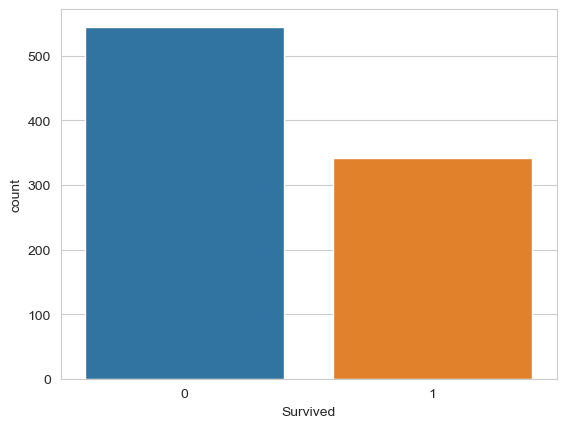

In [64]:
sbn.set_style('whitegrid')
sbn.countplot(x='Survived',data=dataFrame)

In [9]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()

In [14]:
cinsiyet = dataFrame.iloc[:,3:4].values

In [15]:
cinsiyet = dataFrame.iloc[:,3:4].valuescinsiyet = le.fit_transform(cinsiyet)

/Users/yarenuyaroglu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_19683/874503222.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cinsiyet = dataFrame.iloc[:,3:4].valuescinsiyet = le.fit_transform(cinsiyet)


In [16]:
dataFrame["Sex"]=cinsiyet  ##kategorik olan verileri label encoding ile numeric veriye çevirdim.

In [17]:
dataFrame

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


<Axes: xlabel='Survived', ylabel='count'>

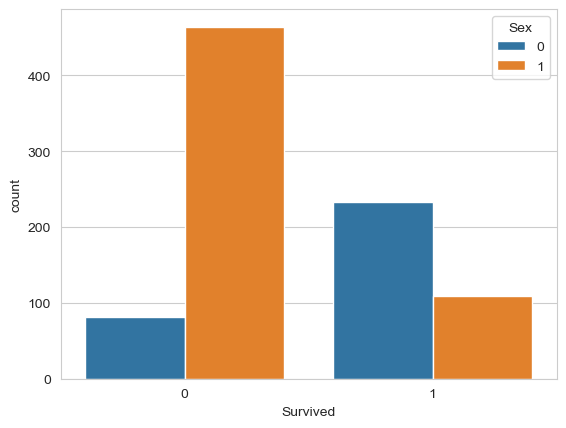

In [70]:
sbn.countplot(x='Survived',hue='Sex',data=dataFrame) 

In [18]:
dataFrame = dataFrame.drop("Name",axis = 1) ##hayatta kalmaya etkisinin olmadığını düşündüğüm name sütununu kaldırdım.

<Axes: xlabel='Survived', ylabel='count'>

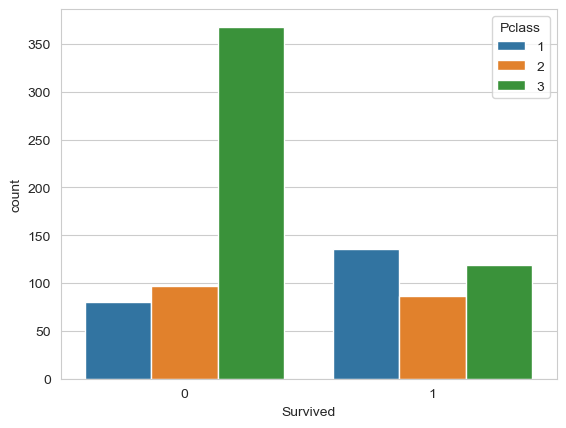

In [72]:
sbn.countplot(x='Survived',hue='Pclass',data=dataFrame)

/var/folders/7s/tq2h5mjn0bv_qd2v2dp2b2kr0000gn/T/ipykernel_19683/2236351281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

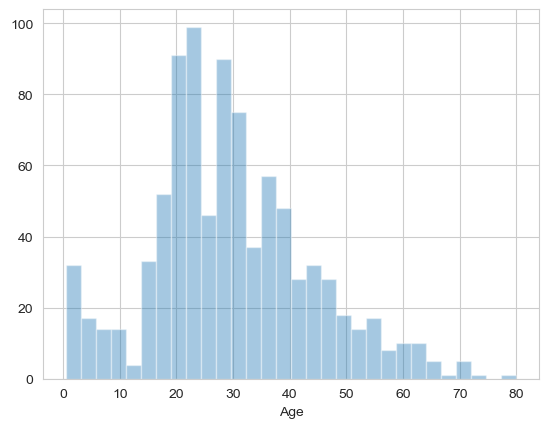

In [75]:
sbn.distplot(dataFrame['Age'].dropna(),kde=False,bins=30)

<Axes: xlabel='Siblings/Spouses Aboard', ylabel='count'>

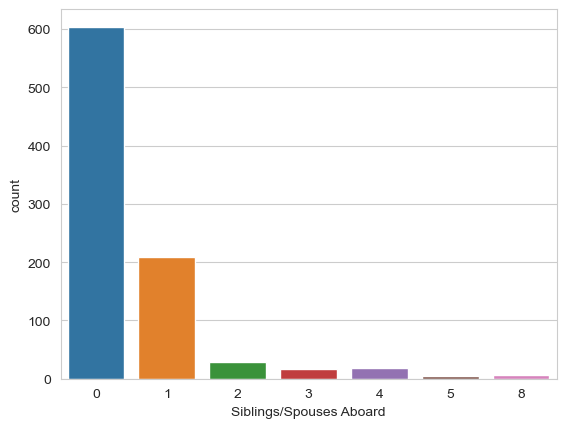

In [80]:
sbn.countplot(x='Siblings/Spouses Aboard',data=dataFrame) # count based on sibling or spouse

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc =preprocessing.StandardScaler()

In [23]:
x = dataFrame.iloc[:,1:7].values

In [24]:
y= dataFrame["Survived"]

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state= 100)

In [27]:
x_train=sc.fit_transform(x_train)

In [28]:
x_test=sc.transform(x_test)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(x, y)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score  

In [53]:
print("Value of the coefficients: \n", model.coef_)  

Value of the oefficients: 
 [-1.80033840e-01 -5.07735561e-01 -6.19716867e-03 -5.02913457e-02
 -1.92834129e-02  4.03397591e-04]


In [54]:
print(f"Mean square error: {mean_squared_error( y_test, y_pred)}") 

Mean square error: 1.130672685240066


In [55]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficient of determination: -3.79
